# бизнес-анализ

Согласно требованиям, необходимо по параметрам вина определить его уровень качества

# анализ данных

In [1]:
import pandas as pd

dt = pd.read_csv('data.csv')

dt.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<AxesSubplot:>

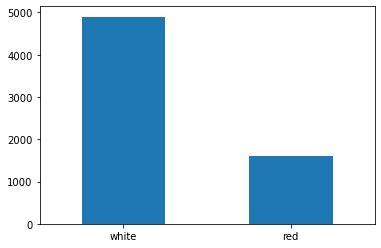

In [2]:
# посмотрим, какие есть варианты в поле type

dt.type.value_counts().plot.bar(x='lab', y='val', rot=0)

<AxesSubplot:ylabel='Frequency'>

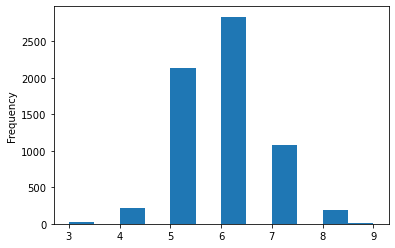

In [17]:
# посмотрим, какие есть варианты оценок и как они распределены

dt.quality.plot.hist(bins=12)

In [3]:
# посмотрим описание всего датасета. Видим незначительное количество неопределенных значений

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# Подготовка данных

In [3]:
# так как неопределенных значений очень мало - избавимся от них

dt = dt.dropna()

In [4]:
# преобразуем в числа тип вина. Так как их всего два - просто бинарным кодом

def binarization(x):
    if x == 'red':
        return 1
    else:
        return 0

dt['typebin'] = dt['type'].apply(binarization)

dt.typebin.value_counts()

0    4870
1    1593
Name: typebin, dtype: int64

In [5]:
X = dt.drop(['type', 'quality'], axis = 1)
Y = dt.quality

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Моделирование

In [7]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Оценка качества

In [8]:
from sklearn.metrics import mean_absolute_error
print('Error, %: {}'.format(mean_absolute_error(pred, y_test)*100/dt.quality.mean()))

Error, %: 7.79269555427839


# Моделирование 2

In [9]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Оценка качества 2

In [10]:
print('Error, %: {}'.format(mean_absolute_error(pred, y_test)*100/dt.quality.mean()))

Error, %: 6.914626629865355


In [11]:
# сохраним успешную модель в фаил

import pickle

filename = "wine_model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(model, file)

# # Load from file
# with open(pkl_filename, 'rb') as file:
#     pickle_model = pickle.load(file)
    
# # Calculate the accuracy score and predict target values
# score = pickle_model.score(Xtest, Ytest)
# print("Test score: {0:.2f} %".format(100 * score))
# Ypredict = pickle_model.predict(Xtest)